In [1]:
import pandas as pd
import seaborn as sns

In [2]:
model = 'bloom-560m'
layer = 'inter-layer-17'

output_plot_path = 'experiments/heatmaps/through_ckpts'

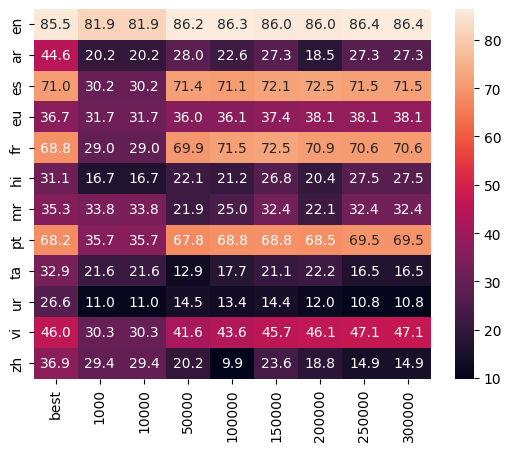

In [3]:
df = pd.read_csv(f'csv_files/{model}_{layer}_f1-score.csv', index_col=0).sort_index() * 100
row_titles = ['en', 'ar', 'es', 'eu', 'fr', 'hi', 'mr', 'pt', 'ta', 'ur', 'vi', 'zh']
df = df.reindex(index=row_titles)
heatmap = sns.heatmap(df, annot=True, fmt=".1f")
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_{layer}_f1_score.pdf', bbox_inches='tight') 

          best      1000     10000    100000    200000    300000    400000  \
ar    0.077330  0.457647  0.203364  0.176615  0.027245  0.678346  0.105271   
es    0.887743  0.727895  0.826337  0.889176  0.990906  0.993016  0.996312   
eu    0.746171  0.703451  0.644629  0.765071  0.769899  0.927408  0.957210   
fr    0.894948  0.727756  0.828873  0.905522  0.992900  0.995207  0.996782   
hi    0.116905  0.657520  0.286740  0.358499  0.062266  0.669454 -0.015551   
pt    0.902158  0.760800  0.795679  0.875740  0.989301  0.990275  0.997125   
ta    0.088106  0.577768  0.201776  0.226207  0.001060  0.158025  0.048556   
ur    0.129696  0.466826  0.146380  0.232983 -0.143666  0.574029  0.228214   
vi    0.865738  0.665003  0.490437  0.753974  0.928092  0.941562  0.940514   
code  0.953850  0.135067  0.376788  0.518225  0.984069  0.990153  0.981627   

        500000    600000  
ar    0.203364  0.356799  
es    0.826337  0.734460  
eu    0.644629  0.746231  
fr    0.828873  0.737500  
hi    

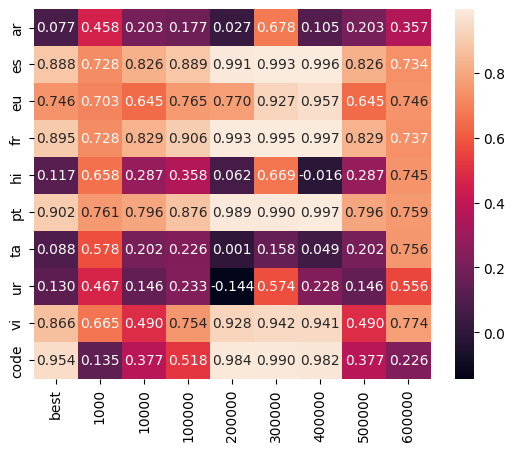

In [3]:
df = pd.read_csv(f'csv_files/{model}_last-layer_cos-similarity.csv', index_col=0)
print(df)
heatmap = sns.heatmap(df, annot=True, fmt=".3f")
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_last_layer_cos-similarity.pdf', bbox_inches='tight') 

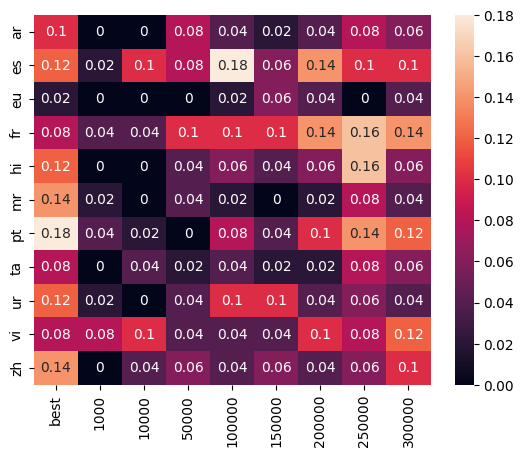

In [5]:
df = pd.read_csv(f'csv_files/{model}_{layer}_ovlp-rate.csv', index_col=0).sort_index()
heatmap = sns.heatmap(df.drop(['en', 'ca']), annot=True)
fig = heatmap.get_figure()
fig.savefig(f'{output_plot_path}/{model}_{layer}_ovlp-rate.pdf', bbox_inches='tight') 